In [1]:
import geopandas
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import fiona
import xarray as xr
import math
import matplotlib.dates as mdate
from scipy import integrate

In [16]:
data = xr.open_mfdataset('D:\pr_mean\pr_day_CanESM5_historical_r3i1p2f1_gn_18500101-20141231.nc',concat_dim='realization')

TypeError: open_dataset() got an unexpected keyword argument 'combine'

In [15]:
data

<xarray.Dataset>
Dimensions:    (time: 165, lat: 11, lon: 7, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01 1851-01-01 ... 2014-01-01
  * lat        (lat) float64 15.35 18.14 20.93 23.72 ... 34.88 37.67 40.46 43.25
  * lon        (lon) float64 106.9 109.7 112.5 115.3 118.1 120.9 123.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) float64 ...

In [17]:
epflux = data.epflux
epflux = epflux.groupby('time.month')
epflux_anomaly = epflux - epflux.mean(dim='time')
epflux_anomaly.to_netcdf('D:\ENSO_salinity\data\epflux\GPCP_OAflux\GPCP_OAflux_epflux_anomaly_mmday.nc')

C:\Users\10173\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [2]:
data = xr.open_dataset('D:/ENSO_salinity/data/epflux/GPCP_OAflux/GPCP_OAflux_epflux_anomaly_mmday.nc')

In [3]:
epflux = data.epflux

In [6]:
s1 = epflux.isel(lon=range(0,36))
s2 = epflux.isel(lon=range(35,360))
s1.coords['lon'] = s1.coords['lon']+360
sada = xr.merge([s2,s1])

In [7]:
sada.to_netcdf('D:\ENSO_salinity\data\epflux\GPCP_OAflux\GPCP_OAflux_epflux_anomaly_mmday_new.nc')

In [9]:
sada.coords['lon']

<xarray.DataArray 'lon' (lon: 361)>
array([ 35.5,  36.5,  37.5, ..., 393.5, 394.5, 395.5])
Coordinates:
  * lon      (lon) float64 35.5 36.5 37.5 38.5 39.5 ... 392.5 393.5 394.5 395.5
Attributes:
    long_name:  longitude
    units:      degrees
    range:      0.5 to 359.5

In [12]:
sada = sada.epflux

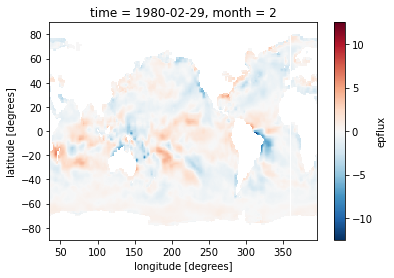

In [13]:
sada[1].plot()